# <font color='darkred' font size = 5>Image Classification project using the CIFAR-10 dataset<br></font>
  <font color='Brown' font size = 6>Name: </font>  <font color='Green' font size = 4>Waqas Shakir<br></font>

 <font color='Brown' font size = 6>Reg No:  </font> <font color='Green' font size = 4> COSC222103030 </font>

# <font color='red' font size = 5>Importing Liabraries<br></font><br>

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# <font color='navy' font size = 5>Loading CIFAR-10 dataset<br></font><br>

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  

# <font color='green' font size = 5>Normalize pixel values to the range 0-1<br></font><br>

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# <font color='blue' font size = 5>Check dataset shape<br></font><br>

In [5]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


# <font color='Red' font size = 5>Class names<br></font><br>

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# <font color='orange' font size = 5>Visualize some images<br></font><br>

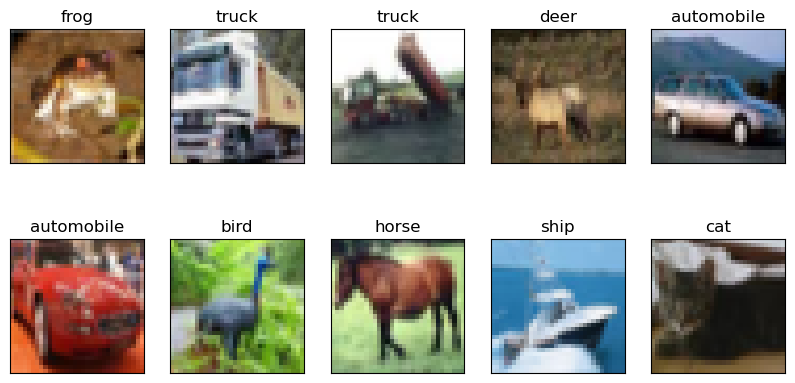

In [7]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
plt.show()

In [8]:
model = Sequential([
    
    #First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    #Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    #Flattening and Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(10, activation='softmax')  # 10 output classes
])

C:\Users\waqas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# <font color='green' font size = 5>Compile the Model<br></font><br>

In [9]:
model.compile(optimizer='adam',  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.3181 - loss: 1.8554 - val_accuracy: 0.5401 - val_loss: 1.3180
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5032 - loss: 1.3846 - val_accuracy: 0.6031 - val_loss: 1.1396
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5660 - loss: 1.2182 - val_accuracy: 0.6383 - val_loss: 1.0391
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6146 - loss: 1.1019 - val_accuracy: 0.6524 - val_loss: 0.9943
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6290 - loss: 1.0562 - val_accuracy: 0.6703 - val_loss: 0.9426
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6463 - loss: 0.9946 - val_accuracy: 0.6804 - val_loss: 0.9095
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.6677 - loss: 0.9465 - val_accuracy: 0.6934 - val_loss: 0.8819
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6809 - loss: 0.9079 - 

# <font color='red' font size = 5>Evaluate the model<br></font><br>

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7115 - loss: 0.8400
Test Accuracy: 0.7057999968528748


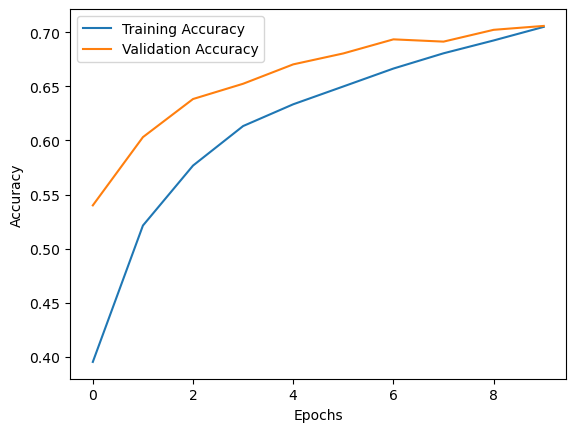

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# <font color='blue' font size = 5># Predict on test images<br></font><br>

In [12]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


# <font color='navy' font size = 5>Visualize predictions<br></font><br>

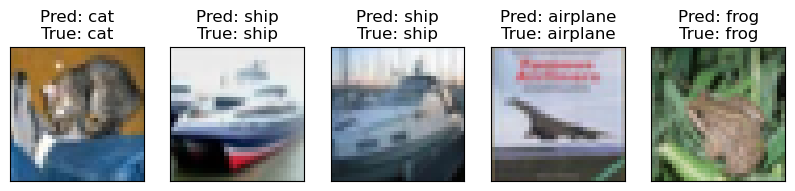

In [13]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predictions[i].argmax()]}\nTrue: {class_names[y_test[i][0]]}")
plt.show()